In [23]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.utils import resample
import skimage.measure
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3.0

np.random.seed(1940)

# Final, best-fit regression
After lots of observations from analysis of parameters and complexity, we run one last best-fit, on 4x4 downsampled terrain data, using OLS with 80th order polynomials.

In [13]:
terrain0 = imread("../input_data/SRTM_data_Norway_1.tif")/1000
terrain1 = skimage.measure.block_reduce(terrain0, (4, 4), np.mean)

In [14]:
reg = Regression()
reg.load_matrix_data(terrain1); terrain1.shape

(901, 451)

In [4]:
data_pred = reg.solveKFold(K=10, poly_order=80, solver="OLS")

In [15]:
# np.save("../data/OLS_BestFit_44_P80.npy", data_pred)
data_pred = np.load("../data/OLS_BestFit_44_P80.npy")

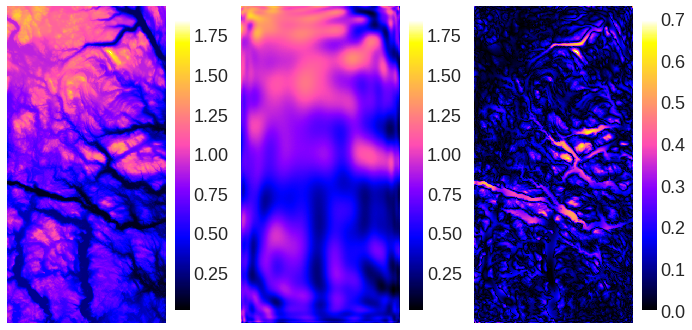

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5.3))
ax1.axis("off"); ax2.axis("off"); ax3.axis("off")
im1 = ax1.imshow(reg.f)
im2 = ax2.imshow(data_pred, vmin=np.min(terrain1), vmax=np.max(terrain1))
im3 = ax3.imshow(np.abs(data_pred-reg.f), vmin=0, vmax=0.7)
plt.colorbar(im1, ax=ax1, shrink=0.85)
plt.colorbar(im2, ax=ax2, shrink=0.85);
plt.colorbar(im3, ax=ax3, shrink=0.85);
plt.tight_layout()
plt.savefig("../figs/BestFitTerrain.pdf", bbox_inches="tight");

In [21]:
MSE(reg.f, data_pred), r2_score(reg.f, data_pred)

(0.018418769378654363, 0.7609906589178799)